# Checkpoint 3

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


sns.set(style="whitegrid")

## Carregar dados

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [4]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [5]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [6]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [7]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [8]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [9]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [10]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [11]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [12]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [13]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [14]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [15]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [16]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [17]:
dados_paises_covid.shape

(330327, 6)

In [18]:
dados_paises_covid_dead.shape

(330327, 6)

In [19]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [20]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276,5671


In [21]:
dados_covid.shape

(330327, 7)

# Aqui começa o trabalho

In [22]:
df = dados_covid

# DESCARTANDO COLUNAS INUTEIS
df = df.drop(columns=['Lat', 'Long', 'province']) 


# REMOVENDO PAÍSES QUE NÃO EXISTEM
non_countries = ['Diamond Princess', 'Summer Olympics 2020', 'Winter Olympics 2022', 'MS Zaandam']
df = df[~df['country'].isin(non_countries)]

## 1 – Agrupar a soma de infectados e mortes de todos os países por data.

In [23]:
df.groupby(["country", "date"])[['infected', 'dead']].sum()

infected  dead
country     date                      
Afghanistan 2020-01-22         0     0
            2020-01-23         0     0
            2020-01-24         0     0
            2020-01-25         0     0
            2020-01-26         0     0
...                          ...   ...
Zimbabwe    2023-03-05    264127  5668
            2023-03-06    264127  5668
            2023-03-07    264127  5668
            2023-03-08    264276  5671
            2023-03-09    264276  5671

[225171 rows x 2 columns]

## 2 – Criar duas colunas contendo a variação bruta diária de infectados e mortos.

In [24]:
df[['diff_infected', 'diff_dead']] = df.groupby('country')[['infected', 'dead']].diff()
df

,country,date,infected,dead,diff_infected,diff_dead
0,Afghanistan,2020-01-22,0,0,NaN,NaN
1,Albania,2020-01-22,0,0,NaN,NaN
2,Algeria,2020-01-22,0,0,NaN,NaN
3,Andorra,2020-01-22,0,0,NaN,NaN
4,Angola,2020-01-22,0,0,NaN,NaN
...,...,...,...,...,...,...
330321,Vietnam,2023-03-09,11526994,43186,0.0,0.0
330322,West Bank and Gaza,2023-03-09,703228,5708,0.0,0.0
330324,Yemen,2023-03-09,11945,2159,0.0,0.0
330325,Zambia,2023-03-09,343135,4057,0.0,0.0


## 3 – Criar duas colunas contendo a variação percentual diária de infectados e mortos.

In [25]:
df[['change_infected', 'change_dead']] = df.groupby('country')[['infected', 'dead']].pct_change()
df

,country,date,infected,dead,diff_infected,diff_dead,change_infected,change_dead
0,Afghanistan,2020-01-22,0,0,NaN,NaN,NaN,NaN
1,Albania,2020-01-22,0,0,NaN,NaN,NaN,NaN
2,Algeria,2020-01-22,0,0,NaN,NaN,NaN,NaN
3,Andorra,2020-01-22,0,0,NaN,NaN,NaN,NaN
4,Angola,2020-01-22,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
330321,Vietnam,2023-03-09,11526994,43186,0.0,0.0,0.0,0.0
330322,West Bank and Gaza,2023-03-09,703228,5708,0.0,0.0,0.0,0.0
330324,Yemen,2023-03-09,11945,2159,0.0,0.0,0.0,0.0
330325,Zambia,2023-03-09,343135,4057,0.0,0.0,0.0,0.0


## 4 – Filtrar os países: Brasil, Estados Unidos, Itália e Canadá.

In [26]:
countries = ['Brazil', 'US', 'Italy', 'Canada']

In [27]:
df.replace(np.nan, 0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

In [28]:
paises_filtrados = df[df['country'].isin(countries)]
paises_filtrados

,country,date,infected,dead,diff_infected,diff_dead,change_infected,change_dead
31,Brazil,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
40,Canada,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
41,Canada,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
42,Canada,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
43,Canada,2020-01-22,0,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
330091,Canada,2023-03-09,13,0,-1320312.0,-18160.0,-0.999990,-1.000000
330092,Canada,2023-03-09,153651,1890,153638.0,1890.0,11818.307692,0.000000
330093,Canada,2023-03-09,4989,32,-148662.0,-1858.0,-0.967530,-0.983069
330192,Italy,2023-03-09,25603510,188322,0.0,0.0,0.000000,0.000000


## 5 – Obter a média mensal da variação bruta de infectados e mortos para cada país. Descreva os resultados.

In [29]:
media_mensal = df
media_mensal['date'] = media_mensal['date'].dt.to_period('m')
media_mensal.groupby(['country', 'date'])[['diff_infected', 'diff_dead']].mean()

diff_infected  diff_dead
country     date                             
Afghanistan 2020-01       0.000000   0.000000
            2020-02       0.172414   0.000000
            2020-03       5.193548   0.129032
            2020-04      55.366667   1.866667
            2020-05     430.741935   6.258065
...                            ...        ...
Zimbabwe    2022-11      42.366667   0.466667
            2022-12      26.354839   0.548387
            2023-01      52.419355   0.483871
            2023-02      82.678571   0.392857
            2023-03      39.444444   0.888889

[7683 rows x 2 columns]

    5: Descrição

Durante a transição de anos nota-se que existem oscilações, os picos de variação bruta são consideravelmente maiores no meio dos anos.

## 6 – Obter a média mensal da variação percentual de infectados e mortos para cada país.

In [30]:
media_mensal.groupby(['country', 'date'])[['change_infected', 'change_dead']].mean()

change_infected  change_dead
country     date                                 
Afghanistan 2020-01         0.000000     0.000000
            2020-02         0.000000     0.000000
            2020-03         0.135789     0.064516
            2020-04         0.084531     0.101561
            2020-05         0.072580     0.049392
...                              ...          ...
Zimbabwe    2022-11         0.000164     0.000083
            2022-12         0.000102     0.000098
            2023-01         0.000202     0.000086
            2023-02         0.000315     0.000069
            2023-03         0.000149     0.000157

[7683 rows x 2 columns]

    6: Descrição

Inicialmente o percentual de infectados e mortos tem um salto súbito que logo declina a partir de poucos meses.

## 7 – Gerar os seguintes gráficos:

### a) Gráfico de barras contendo a evolução média mensal da variação BRUTA de infectados para Brasil. E.U.A e Itália

    Brasil:

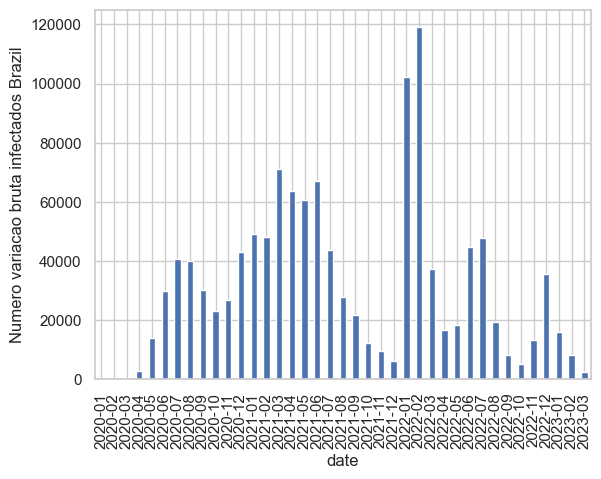

In [31]:
def plot_country_diff(country):
    plt.xlabel("Data")
    plt.ylabel("Numero variacao bruta infectados %s" % country)
    _ = media_mensal[media_mensal['country'] == country].groupby('date')['diff_infected'].mean().plot.bar()    

plot_country_diff('Brazil')

    E.U.A:

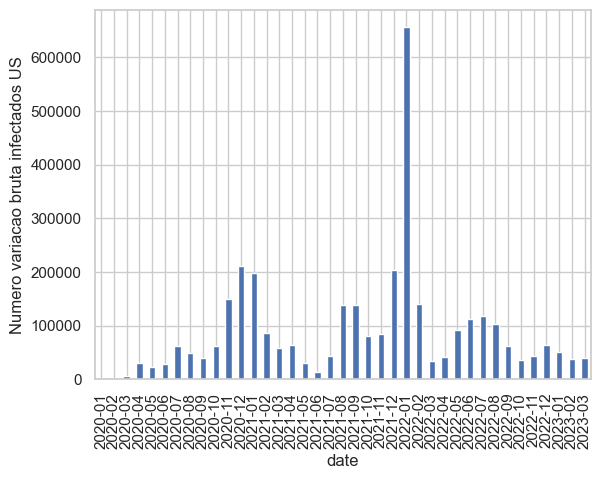

In [32]:
plot_country_diff('US')

    Itália:

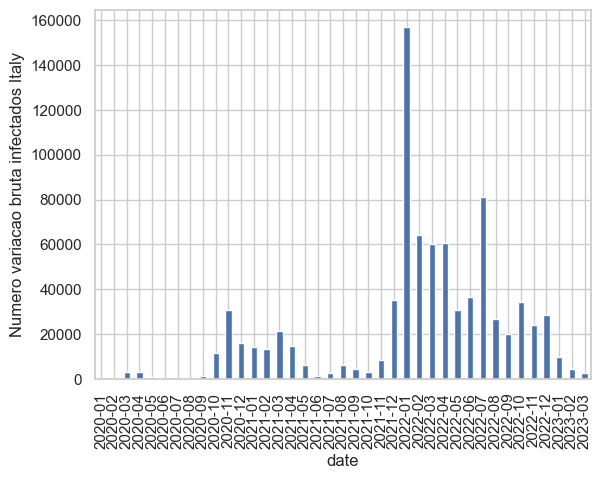

In [33]:
plot_country_diff('Italy')

### b) Gráfico de linhas contendo a evolução média mensal da variação PERCENTUAL de mortes para Brasil. E.U.A e Itália

    Brasil:

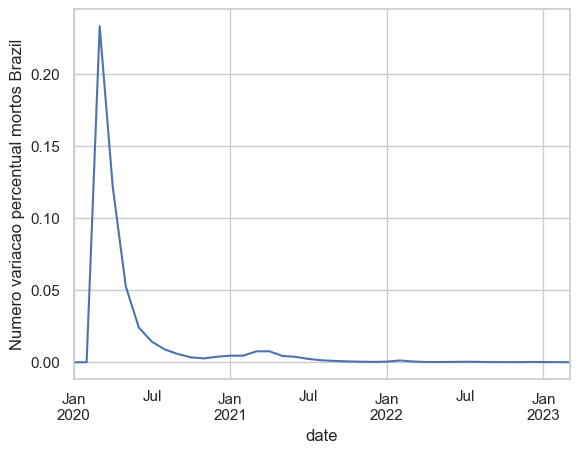

In [34]:
def plot_country_change(country):
    plt.xlabel("Data")
    plt.ylabel("Numero variacao percentual mortos %s" % country)
    _ = media_mensal[media_mensal['country'] == country].groupby('date')['change_dead'].mean().plot()

plot_country_change('Brazil')

    E.U.A:

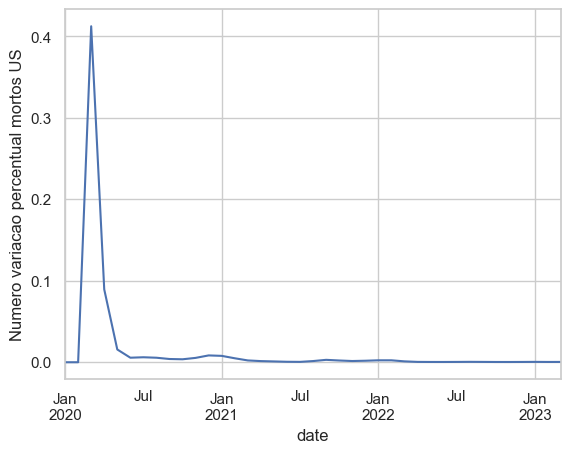

In [35]:
plot_country_change('US')

    Itália:

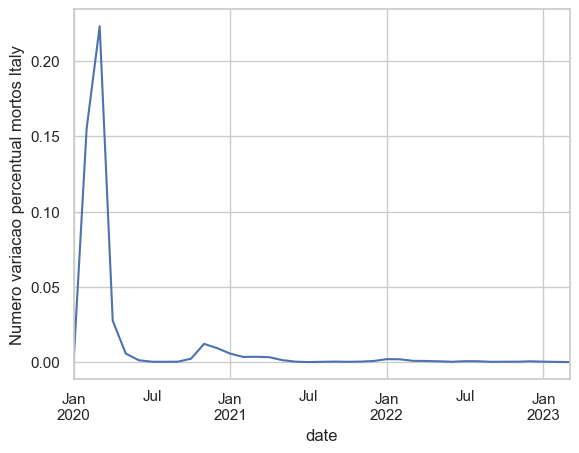

In [36]:
plot_country_change('Italy')